In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

We have imported all the required libraries here.

In [2]:
df=pd.read_excel('customer_retention_dataset.xlsx')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


We are reading the data set in python

In [3]:
df=pd.DataFrame(data=df)
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


We have loaded the dataset in a DataFrame.

In [4]:
df.sample(15)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
57,Male,21-30 years,Delhi,110044,Less than 1 year,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Paytm.com,"Flipkart.com, Snapdeal.com",Myntra.com,Myntra.com,Snapdeal.com,Myntra.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com"
48,Female,31-40 years,Greater Noida,203202,2-3 years,Less than 10 times,Mobile internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
210,Female,41-50 yaers,Karnal,132001,Above 4 years,41 times and above,Mobile internet,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
170,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
225,Male,Less than 20 years,Noida,201308,2-3 years,Less than 10 times,Mobile internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
85,Female,21-30 years,Bangalore,560002,Above 4 years,Less than 10 times,Mobile internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
94,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
13,Female,31-40 years,Greater Noida,201310,Above 4 years,11-20 times,Wi-Fi,Laptop,Others,Window/windows Mobile,...,"Amazon.in, Flipkart.com, Snapdeal.com",Snapdeal.com,snapdeal.com,Myntra.com,Snapdeal.com,Snapdeal.com,Paytm.com,Snapdeal.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com"
115,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
150,Female,21-30 years,Greater Noida,201306,Less than 1 year,31-40 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Myntra.com,Snapdeal.com,snapdeal.com,"Paytm.com, Snapdeal.com","Paytm.com, Snapdeal.com","Paytm.com, Snapdeal.com","Amazon.in, Flipkart.com",Snapdeal.com,Flipkart.com,"Amazon.in, Flipkart.com, Myntra.com"


Here we fetched out some 15 samples for our further study

In [5]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

Here we fetched out all the column names present in our dataset.

In [6]:
df.shape

(269, 71)

There are 269 rows and 71 columns in our dataset.

In [7]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

Here we get the datatypes of all the columns. Almost all the columns are of object datatype and few are of integer datatype.

In [8]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

There are no null valuess in the dataset.

# Univariate Analysis : Countplot & Histogram

[Text(0, 0, 'Flipkart.com'),
 Text(1, 0, 'Amazon.in, Myntra.com'),
 Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
 Text(3, 0, 'Amazon.in, Flipkart.com'),
 Text(4, 0, 'Amazon.in, Paytm.com'),
 Text(5, 0, 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com'),
 Text(6, 0, 'Amazon.in'),
 Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com')]

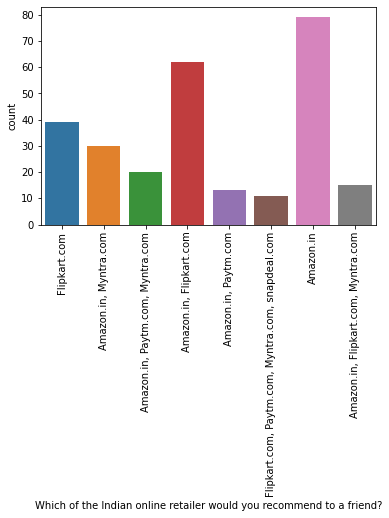

In [9]:
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?']).set_xticklabels(labels=df['Which of the Indian online retailer would you recommend to a friend?'].unique(),rotation=90)

There are many different sets , and lot of class imbalance exist in the dataset.

# Histogram

There are 71 columns and all those columns are not even important for our study. To drop some columns we are studying the histogram.

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

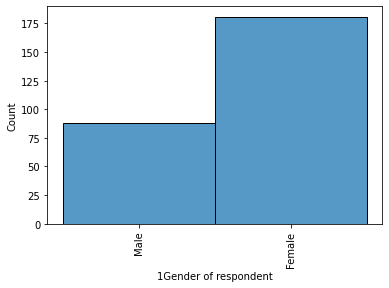

In [10]:
sns.histplot(df.iloc[:,0]).set_xticklabels(labels=df.iloc[:,0].unique(),rotation=90)

Almost 2-3rd of the customers are female . Hence we can say that Female loves shopping.

[Text(0, 0, '31-40 years'),
 Text(1, 0, '21-30 years'),
 Text(2, 0, '41-50 yaers'),
 Text(3, 0, 'Less than 20 years'),
 Text(4, 0, '51 years and above')]

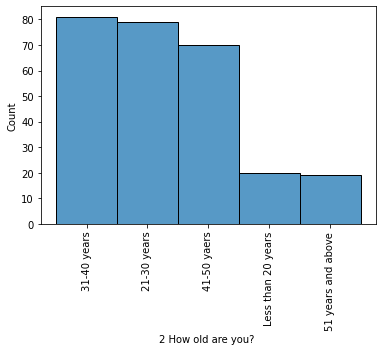

In [11]:
sns.histplot(df.iloc[:,1]).set_xticklabels(labels=df.iloc[:,1].unique(),rotation=90)

There are maximum customers ranging from a wide age group.Hence we can surely drop this column. 

[Text(0, 0, 'Delhi'),
 Text(1, 0, 'Greater Noida'),
 Text(2, 0, 'Karnal '),
 Text(3, 0, 'Bangalore '),
 Text(4, 0, 'Noida'),
 Text(5, 0, 'Solan'),
 Text(6, 0, 'Moradabad'),
 Text(7, 0, 'Gurgaon '),
 Text(8, 0, 'Merrut'),
 Text(9, 0, 'Ghaziabad'),
 Text(10, 0, 'Bulandshahr')]

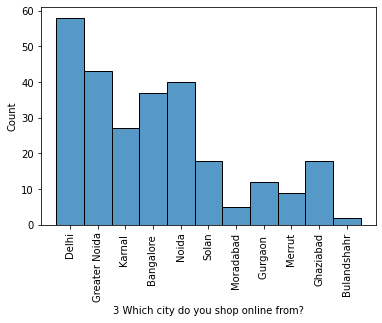

In [12]:
sns.histplot(df.iloc[:,2]).set_xticklabels(labels=df.iloc[:,2].unique(),rotation=90)

People of Metro cities and smaller cities both are placing many orders. Hence, we can conclude that people shop irrespective of the city they reside in.

[Text(0, 0, 'Above 4 years'),
 Text(1, 0, '3-4 years'),
 Text(2, 0, '2-3 years'),
 Text(3, 0, 'Less than 1 year'),
 Text(4, 0, '1-2 years')]

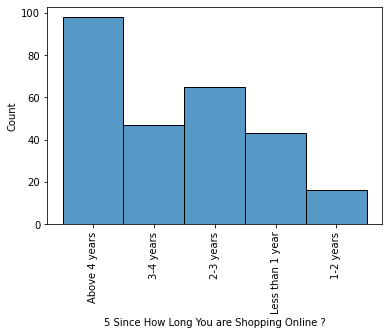

In [13]:
sns.histplot(df.iloc[:,4]).set_xticklabels(labels=df.iloc[:,4].unique(),rotation=90)

More than half of customers are shopping online from 1-4 years and less than average people are shopping online from more than 4 years. The longer the duration is , the higher seems the retention rate.

[Text(0, 0, '31-40 times'),
 Text(1, 0, '41 times and above'),
 Text(2, 0, 'Less than 10 times'),
 Text(3, 0, '11-20 times'),
 Text(4, 0, '21-30 times'),
 Text(5, 0, '42 times and above')]

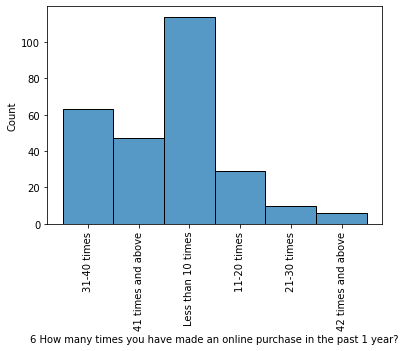

In [14]:
sns.histplot(df.iloc[:,5]).set_xticklabels(labels=df.iloc[:,5].unique(),rotation=90)

Maximum people have only shopped online last year for less than 10 times.

[Text(0, 0, 'Dial-up'),
 Text(1, 0, 'Wi-Fi'),
 Text(2, 0, 'Mobile Internet'),
 Text(3, 0, 'Mobile internet')]

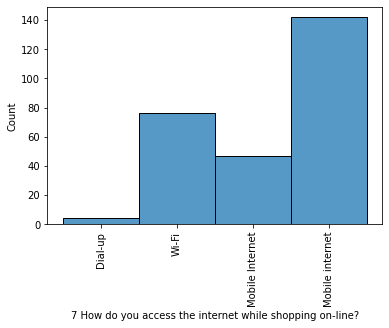

In [15]:
sns.histplot(df.iloc[:,6]).set_xticklabels(labels=df.iloc[:,6].unique(),rotation=90)

More than 2-3rd customer uses Mobile Internet for the shopping. But this variable seems irrelevant in our study .

[Text(0, 0, 'Desktop'),
 Text(1, 0, 'Smartphone'),
 Text(2, 0, 'Tablet'),
 Text(3, 0, 'Laptop')]

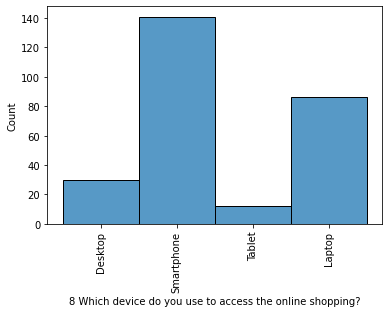

In [16]:
sns.histplot(df.iloc[:,7]).set_xticklabels(labels=df.iloc[:,7].unique(),rotation=90)

50% of the customers are using Smartphone to access online store and rest are using other means to access. But this data also seems irrelevant in finding out if a customer will retain or not .

[Text(0, 0, 'Others'),
 Text(1, 0, '4.7 inches'),
 Text(2, 0, '5.5 inches'),
 Text(3, 0, '5 inches')]

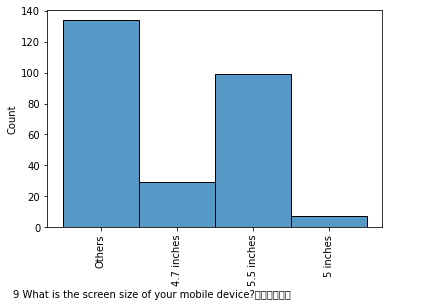

In [17]:
sns.histplot(df.iloc[:,8]).set_xticklabels(labels=df.iloc[:,8].unique(),rotation=90)

The screen size of device to access the online store seems irrelevant to the target . Hence we can drop this column.

[Text(0, 0, 'Window/windows Mobile'),
 Text(1, 0, 'IOS/Mac'),
 Text(2, 0, 'Android')]

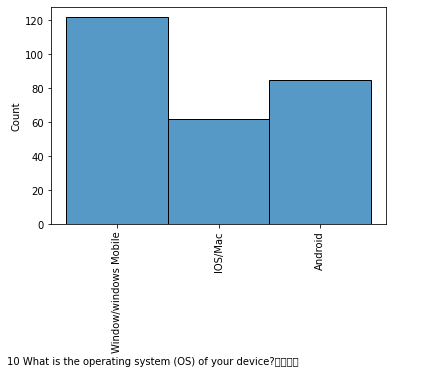

In [18]:
sns.histplot(df.iloc[:,9]).set_xticklabels(labels=df.iloc[:,9].unique(),rotation=90)

[Text(0, 0, 'Window/windows Mobile'),
 Text(1, 0, 'IOS/Mac'),
 Text(2, 0, 'Android')]

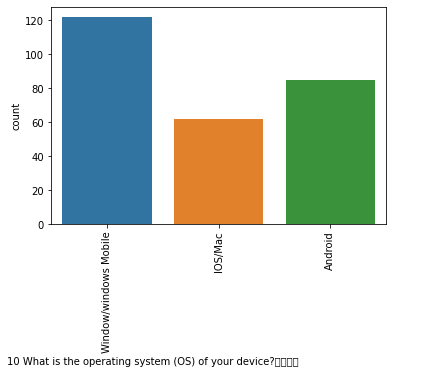

In [19]:
sns.countplot(df.iloc[:,9]).set_xticklabels(labels=df.iloc[:,9].unique(),rotation=90)

Almost half of the customer uses Windows OS and Other half uses either IOS/Mac or Android. But even this data seems irrelevant to our target.

[Text(0, 0, 'Google chrome'),
 Text(1, 0, 'Safari'),
 Text(2, 0, 'Opera'),
 Text(3, 0, 'Mozilla Firefox')]

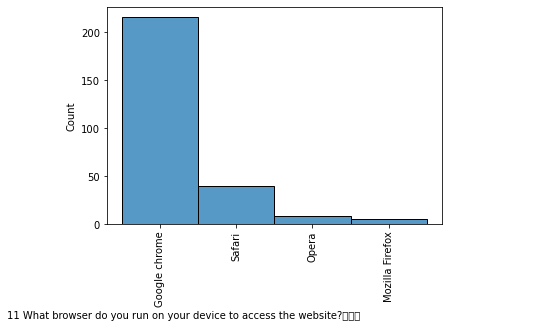

In [20]:
sns.histplot(df.iloc[:,10]).set_xticklabels(labels=df.iloc[:,10].unique(),rotation=90)

Almost all the customers uses Google Chrome To access the website.

[Text(0, 0, 'Search Engine'),
 Text(1, 0, 'Content Marketing'),
 Text(2, 0, 'Display Adverts')]

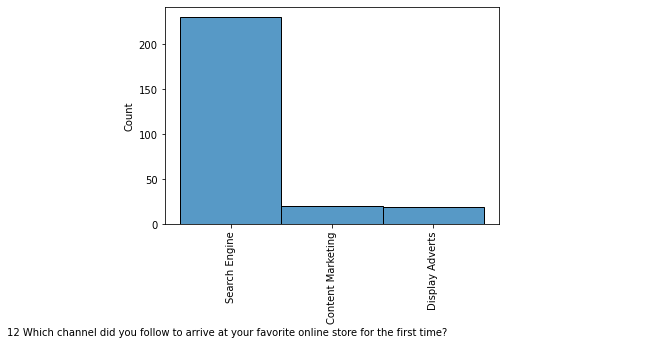

In [21]:
sns.histplot(df.iloc[:,11]).set_xticklabels(labels=df.iloc[:,11].unique(),rotation=90)

Almost all the customers uses Search Engine to arrive at their favorite online store.

[Text(0, 0, 'Search Engine'),
 Text(1, 0, 'Via application'),
 Text(2, 0, 'Direct URL'),
 Text(3, 0, 'E-mail'),
 Text(4, 0, 'Social Media')]

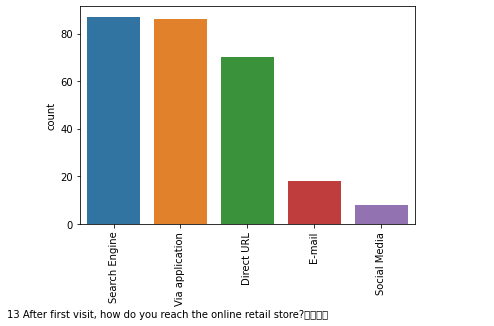

In [22]:
sns.countplot(df.iloc[:,12]).set_xticklabels(labels=df.iloc[:,12].unique(),rotation=90)

After first visit to the online store , if the customer retains , they will either mostly access the website through search engine or they'll download the application for their convenience, and some save the URL for direct access. Only few customers reach the page via Email or Socail Media. 

[Text(0, 0, '6-10 mins'),
 Text(1, 0, 'more than 15 mins'),
 Text(2, 0, '11-15 mins'),
 Text(3, 0, '1-5 mins'),
 Text(4, 0, 'Less than 1 min')]

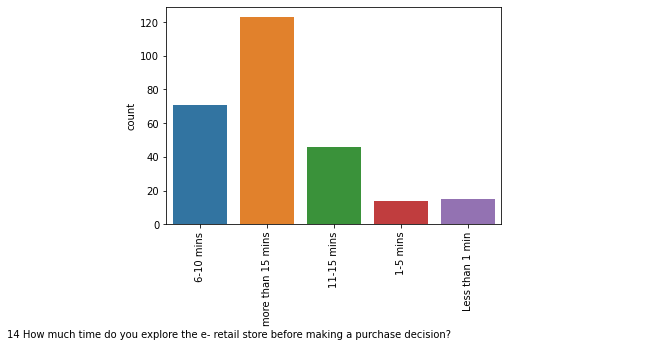

In [23]:
sns.countplot(df.iloc[:,13]).set_xticklabels(labels=df.iloc[:,13].unique(),rotation=90)

[Text(0, 0, 'E-wallets (Paytm, Freecharge etc.)'),
 Text(1, 0, 'Credit/Debit cards'),
 Text(2, 0, 'Cash on delivery (CoD)')]

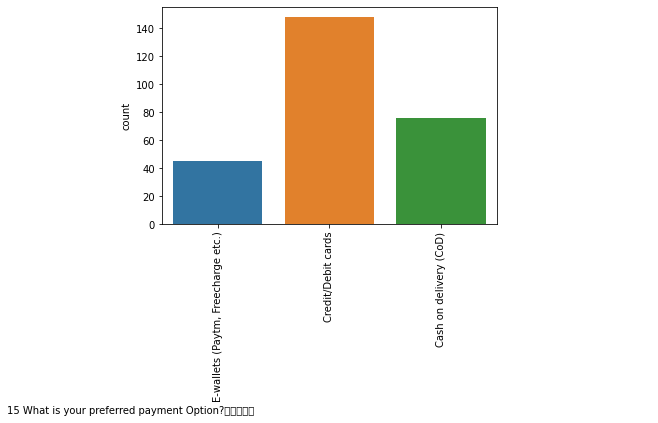

In [24]:
sns.countplot(df.iloc[:,14]).set_xticklabels(labels=df.iloc[:,14].unique(),rotation=90)

[Text(0, 0, 'Lack of trust'),
 Text(1, 0, 'Promo code not applicable'),
 Text(2, 0, 'Better alternative offer'),
 Text(3, 0, 'Change in price'),
 Text(4, 0, 'No preferred mode of payment')]

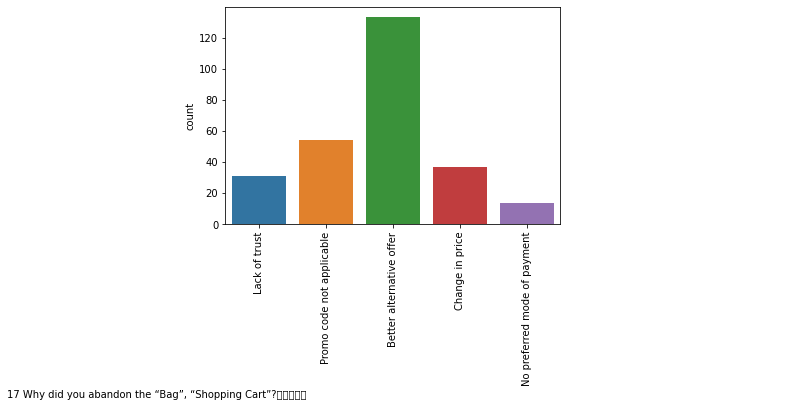

In [25]:
sns.countplot(df.iloc[:,16]).set_xticklabels(labels=df.iloc[:,16].unique(),rotation=90)

[Text(0, 0, 'Agree (4)'),
 Text(1, 0, 'Strongly agree (5)'),
 Text(2, 0, 'Strongly disagree (1)'),
 Text(3, 0, 'Indifferent (3)')]

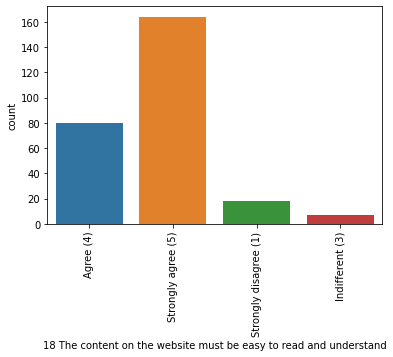

In [26]:
sns.countplot(df.iloc[:,17]).set_xticklabels(labels=df.iloc[:,17].unique(),rotation=90)

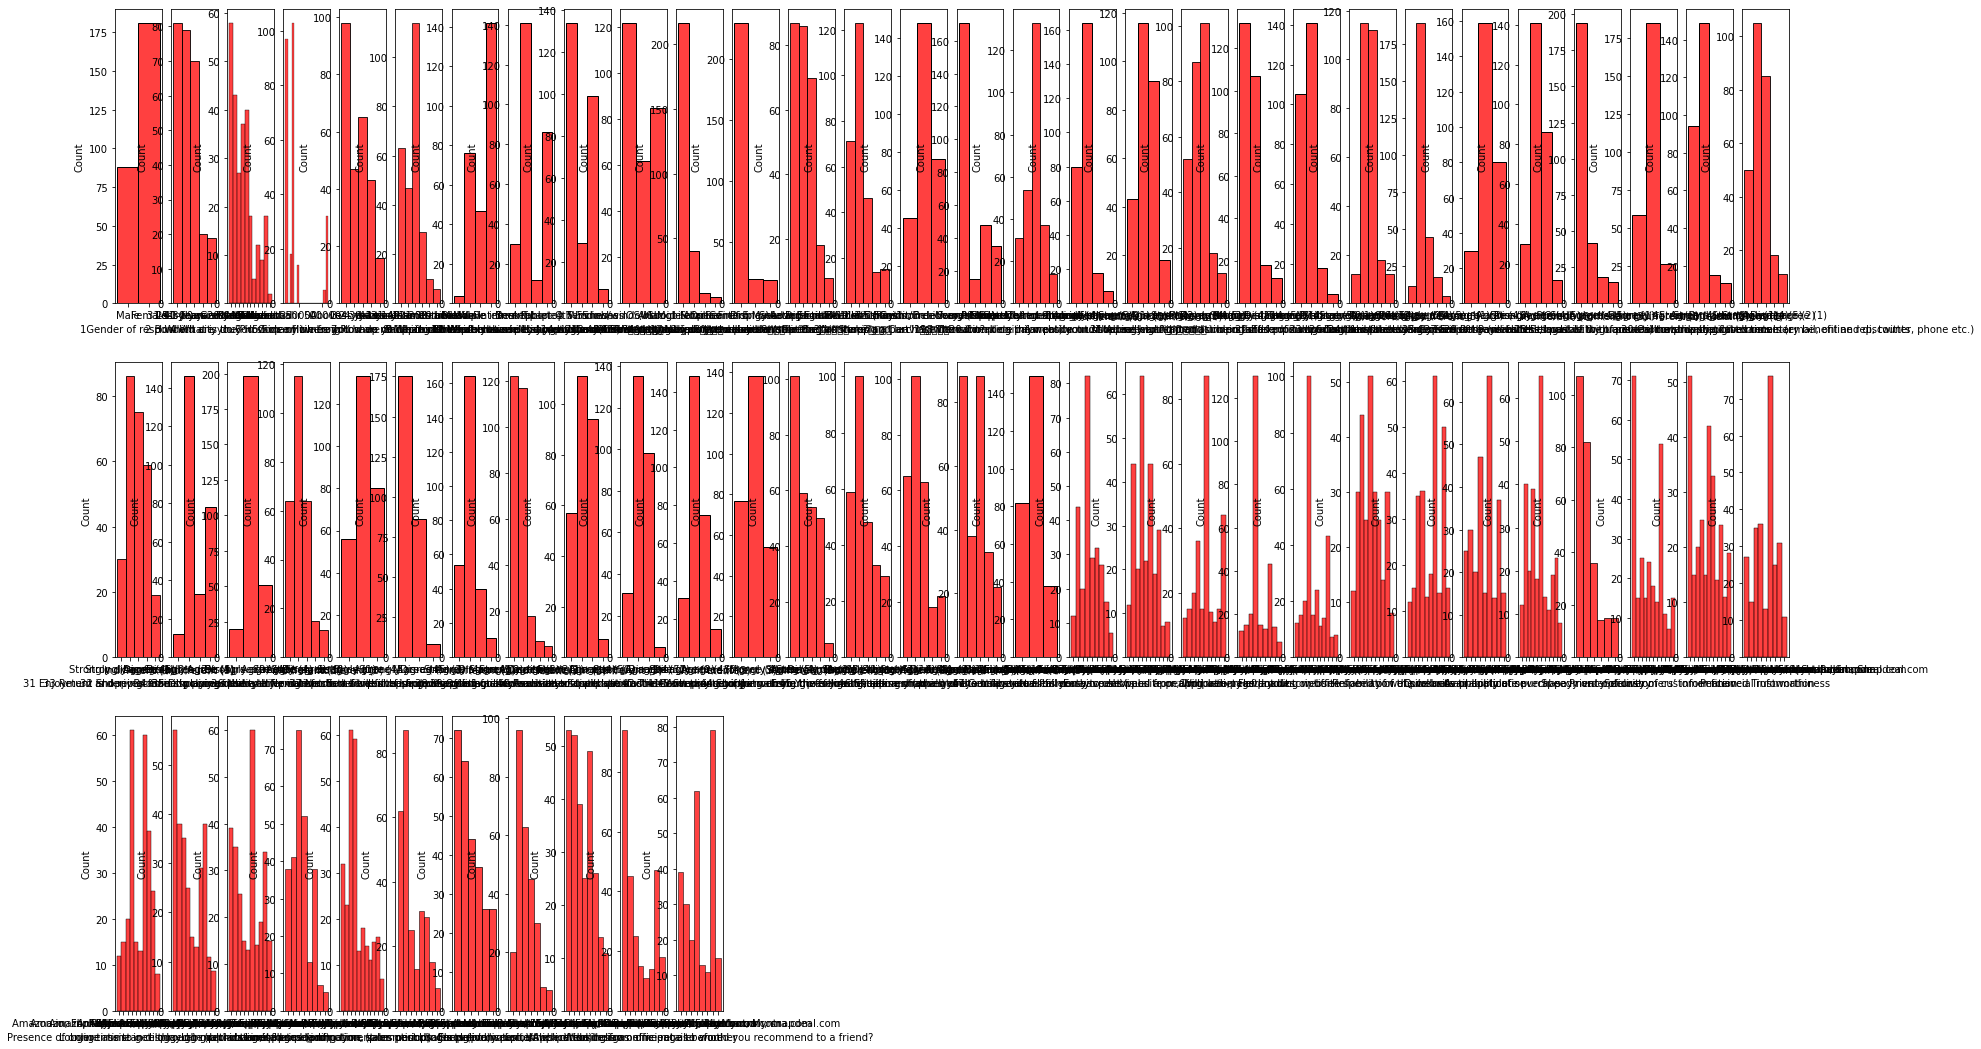

In [27]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.histplot(data=df[collist[i]],color='red')

To observe this more precisely , we will plots garpsh for 10 - 10 columns together.

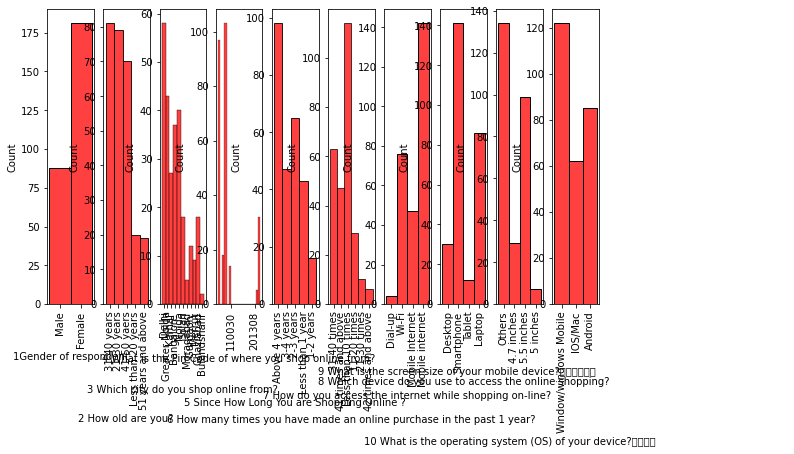

In [28]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,10):
    plt.subplot(nrows,ncol,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)

Here we can see that first 2 columns with index [0,1] can add some significance , so we can drop the rest columns here.

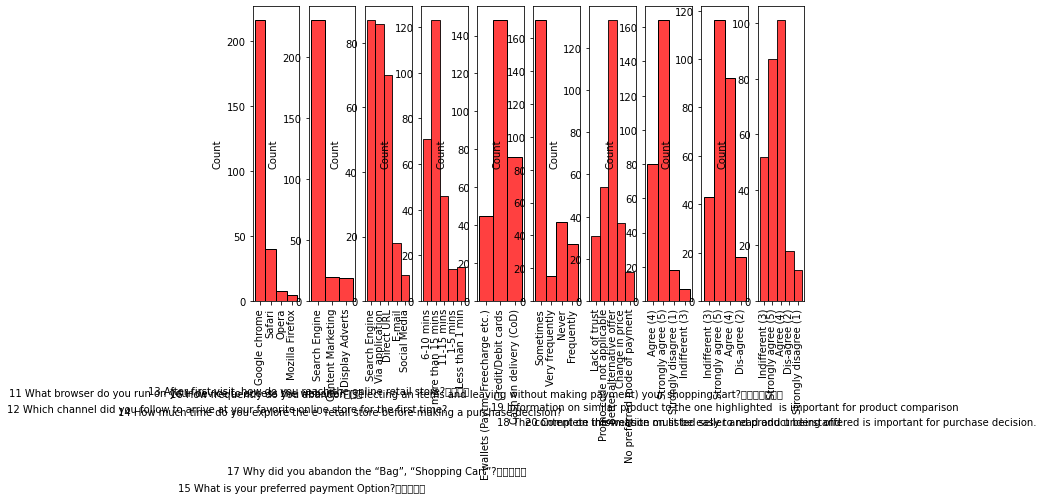

In [29]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(10,20):
    plt.subplot(nrows,ncol,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)

Here we can see that many people uses search engine to reach the website , hence we need to imporove our marketing to make them reach the website. So relevant columns from tgis grapgh can be with indexes [11,14,15,19]

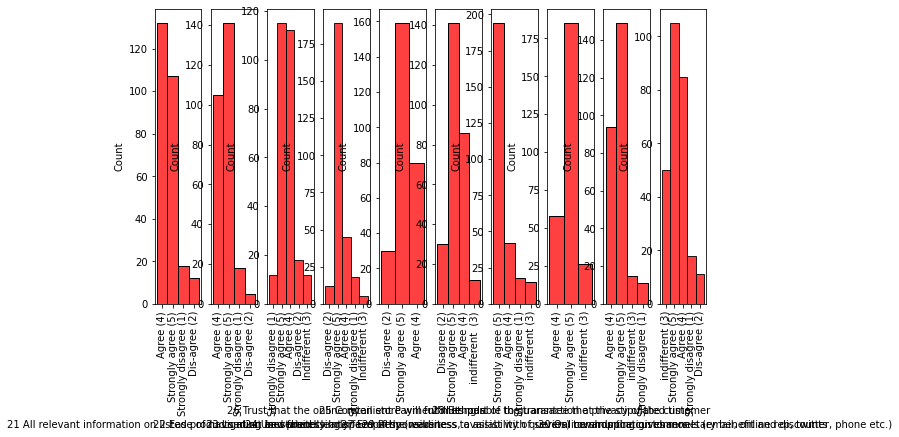

In [30]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(20,30):
    plt.subplot(nrows,ncol,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)

First 2 , next 2 and last two datas are quite same. We can chhose any one from each pair. Let's select columns with indexes [21,23,29]

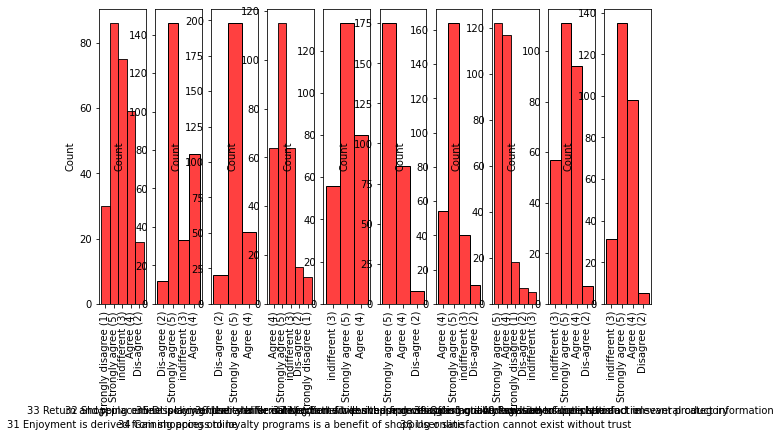

In [31]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(30,40):
    plt.subplot(nrows,ncol,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)

Here only two columns seems to add another significance , they are with index [32,38] . Rest all seeme to have either similar data to previous coulmns or insignificant data.

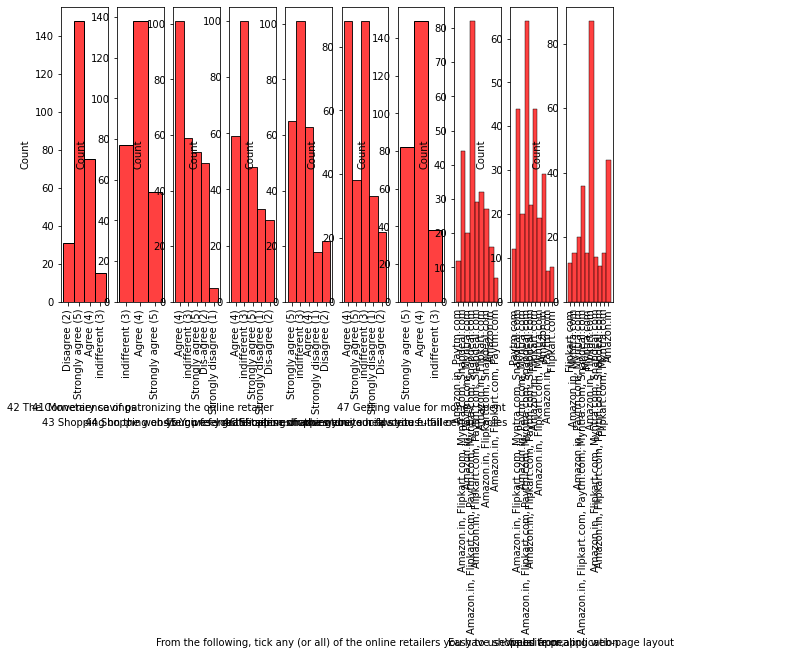

In [32]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(40,50):
    plt.subplot(nrows,ncol,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)

Here after studying the graph we will choose two columns for our study [42,48] 

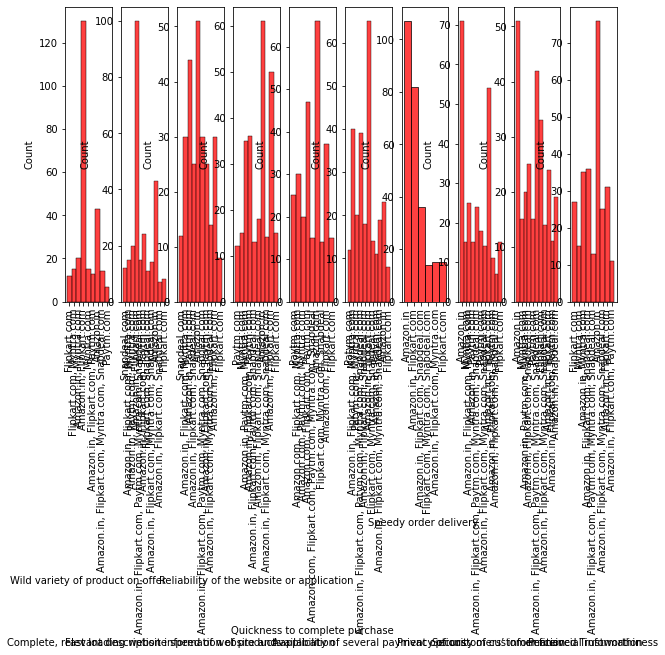

In [33]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(50,60):
    plt.subplot(nrows,ncol,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)

The column with index [52] seems to have a significant mark on our data , hence we will choose that and can drop rest from this set.

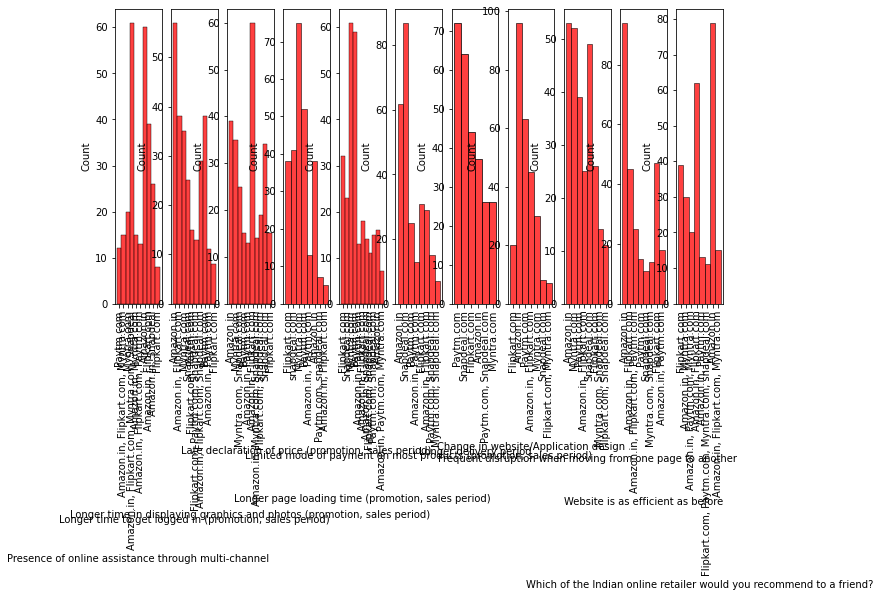

In [34]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(60,71):
    plt.subplot(nrows,ncol,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)

Only the last column with index [70] has significance to our data and rest columns have kind of similar data to the previous ones, which can be skipped.

[Text(0, 0, 'Flipkart.com'),
 Text(1, 0, 'Amazon.in, Myntra.com'),
 Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
 Text(3, 0, 'Amazon.in, Flipkart.com'),
 Text(4, 0, 'Amazon.in, Paytm.com'),
 Text(5, 0, 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com'),
 Text(6, 0, 'Amazon.in'),
 Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com')]

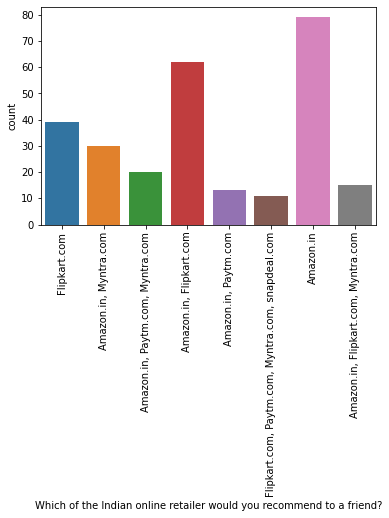

In [35]:
sns.countplot(df.iloc[:,70]).set_xticklabels(labels=df.iloc[:,70].unique(),rotation=90)

Here we get a widespread of data which says that Customer visit multiple online store before making a purchase, so it's important for us to make a customer stay on our webpage.

In [36]:
X = df.iloc[:,[0,5,11,14,15,19,21,23,24,28,29,32,36,38,46,48,70]]
X

,1Gender of respondent,6 How many times you have made an online purchase in the past 1 year?,12 Which channel did you follow to arrive at your favorite online store for the first time?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,20 Complete information on listed seller and product being offered is important for purchase decision.,22 Ease of navigation in website,24 User friendly Interface of the website,25 Convenient Payment methods,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,33 Return and replacement policy of the e-tailer is important for purchase decision,37 Net Benefit derived from shopping online can lead to users satisfaction,39 Offering a wide variety of listed product in several category,47 Getting value for money spent,Easy to use website or application,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 times,Search Engine,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Indifferent (3),Agree (4),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Paytm.com,Flipkart.com
1,Female,41 times and above,Search Engine,Credit/Debit cards,Very frequently,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com"
2,Female,41 times and above,Search Engine,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Agree (4),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com"
3,Male,Less than 10 times,Search Engine,Credit/Debit cards,Never,Indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),Agree (4),indifferent (3),Agree (4),Agree (4),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com"
4,Female,11-20 times,Content Marketing,Credit/Debit cards,Frequently,Indifferent (3),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,Less than 10 times,Display Adverts,Cash on delivery (CoD),Never,Agree (4),Agree (4),Agree (4),Agree (4),Agree (4),indifferent (3),Dis-agree (2),indifferent (3),Agree (4),indifferent (3),Amazon.in,Amazon.in
265,Female,31-40 times,Search Engine,Cash on delivery (CoD),Sometimes,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Flipkart.com,Flipkart.com
266,Female,Less than 10 times,Search Engine,Credit/Debit cards,Sometimes,Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),Agree (4),Agree (4),Strongly agree (5),Agree (4),indifferent (3),Agree (4),Amazon.in,Amazon.in
267,Female,Less than 10 times,Search Engine,Cash on delivery (CoD),Sometimes,Strongly agree (5),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Strongly agree (5),Strongly agree (5),indifferent (3),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com",Amazon.in


There were so many unnecessary columns in the dataset so we made another variable and loaded it with only necessary columns for out study.

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 17 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                         --------------  ----- 
 0   1Gender of respondent                                                                                                                                                          269 non-null    object
 1   6 How many times you have made an online purchase in the past 1 year?                                                                                                          269 non-null    object
 2   12 Which channel did you follow to arrive at your favorite online store for th

It gives us the Number of columns, Their datatypes, Total number of non-null values each column has and memory usage.

In [38]:
X.describe()

,1Gender of respondent,6 How many times you have made an online purchase in the past 1 year?,12 Which channel did you follow to arrive at your favorite online store for the first time?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,20 Complete information on listed seller and product being offered is important for purchase decision.,22 Ease of navigation in website,24 User friendly Interface of the website,25 Convenient Payment methods,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,33 Return and replacement policy of the e-tailer is important for purchase decision,37 Net Benefit derived from shopping online can lead to users satisfaction,39 Offering a wide variety of listed product in several category,47 Getting value for money spent,Easy to use website or application,Which of the Indian online retailer would you recommend to a friend?
count,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269
unique,2,6,3,3,4,5,4,5,3,4,5,3,4,4,3,10,8
top,Female,Less than 10 times,Search Engine,Credit/Debit cards,Sometimes,Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in
freq,181,114,230,148,171,101,141,189,159,149,105,198,164,111,149,64,79


It gives us the total value count of data of each column , number of unique values from each column, Highest occuring data and it's frequency of occurence. 

Now we will plot some other graphs.

Before that We will have to change the categorical data into ordinal data for which we will use Label Encoding Technique.

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in X.columns:
    X[column]=le.fit_transform(X[column])
X    

,1Gender of respondent,6 How many times you have made an online purchase in the past 1 year?,12 Which channel did you follow to arrive at your favorite online store for the first time?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,20 Complete information on listed seller and product being offered is important for purchase decision.,22 Ease of navigation in website,24 User friendly Interface of the website,25 Convenient Payment methods,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,33 Return and replacement policy of the e-tailer is important for purchase decision,37 Net Benefit derived from shopping online can lead to users satisfaction,39 Offering a wide variety of listed product in several category,47 Getting value for money spent,Easy to use website or application,Which of the Indian online retailer would you recommend to a friend?
0,1,2,2,2,2,2,0,1,1,0,4,1,0,3,1,9,6
1,0,3,2,1,3,3,2,3,2,1,2,2,2,2,1,3,3
2,0,3,2,2,2,0,0,3,2,1,2,2,2,2,0,7,5
3,1,5,2,1,1,2,2,3,2,0,0,0,3,0,0,4,1
4,0,0,0,1,0,2,0,3,2,1,2,2,2,0,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0,5,1,0,1,0,0,0,0,0,4,1,3,0,2,0,0
265,0,2,2,0,2,3,2,3,2,1,2,2,2,2,1,8,6
266,0,5,2,1,2,0,2,0,2,0,0,2,0,3,0,0,0
267,0,5,2,0,2,3,0,3,2,1,2,0,2,2,2,3,0


<AxesSubplot:xlabel='1Gender of respondent', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

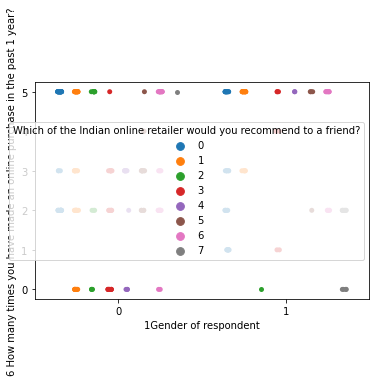

In [40]:
sns.stripplot(x ='1Gender of respondent', y ='6 How many times you have made an online purchase in the past 1 year?', data = X,jitter = True, hue ='Which of the Indian online retailer would you recommend to a friend?', dodge = True)

<AxesSubplot:xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

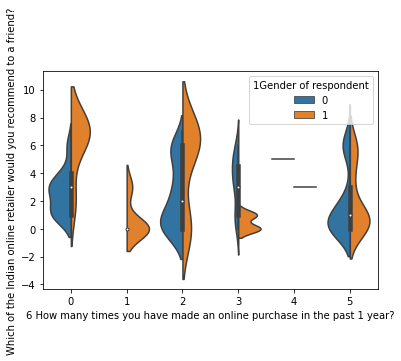

In [41]:
sns.violinplot(x ='6 How many times you have made an online purchase in the past 1 year?', y ='Which of the Indian online retailer would you recommend to a friend?', data = X, hue ='1Gender of respondent', split = True)

We are plotting BoxPlot to check for outliers. Though it's categorical data and there's no need to remove outliers, but it will give us a hint of spread of data.

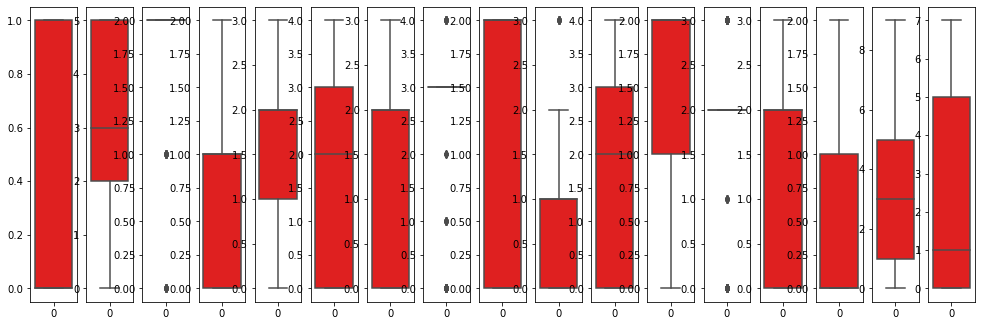

In [42]:
collist=X.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=X[collist[i]],color='red',orient='v')

Column 2 and 7 have very spreaded data . 

<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

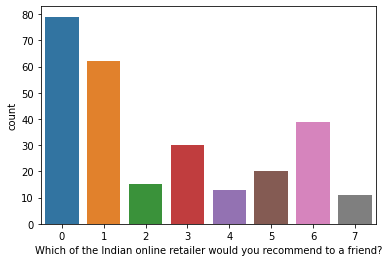

In [43]:
sns.countplot(X['Which of the Indian online retailer would you recommend to a friend?'])

There is too much class imbalance is present which we will have to treat for training the dataset.

# Multivariate Analysis

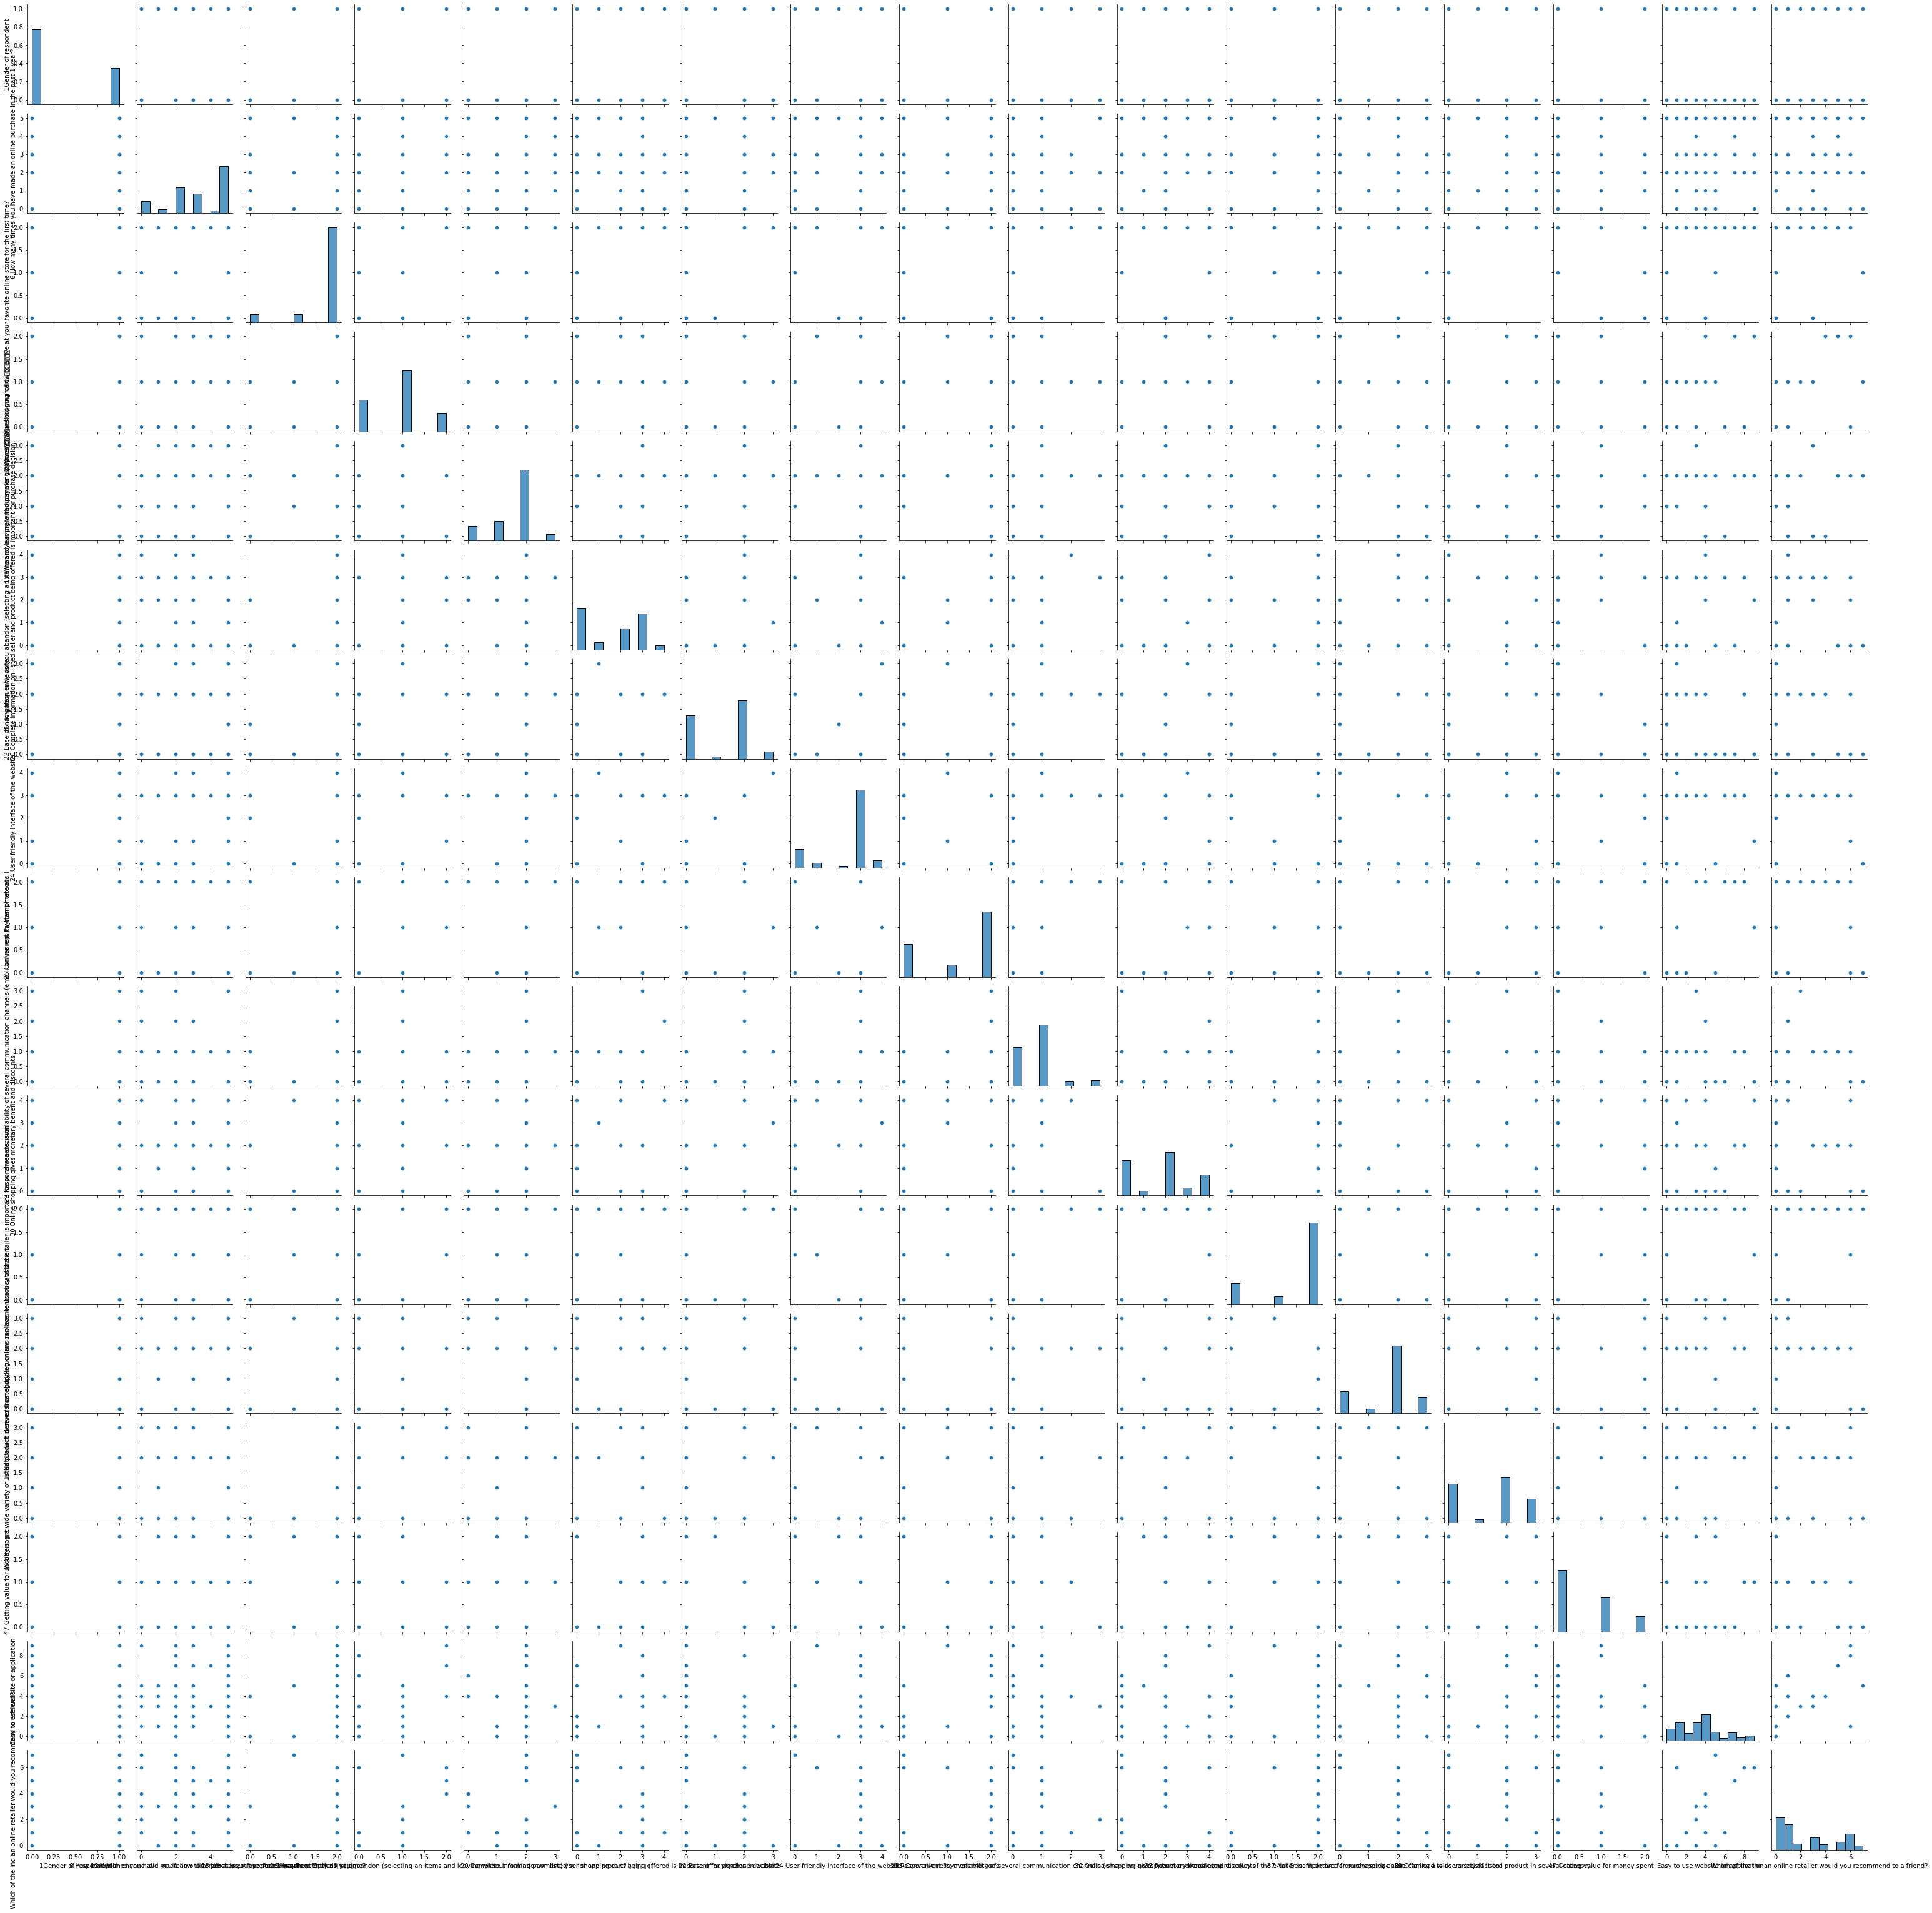

In [44]:
sns.pairplot(X)

Pairplot gives the distribution of each variable and also gives the relationship between each variable to every another variable

In [45]:
x=X.corr()
x

,1Gender of respondent,6 How many times you have made an online purchase in the past 1 year?,12 Which channel did you follow to arrive at your favorite online store for the first time?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,20 Complete information on listed seller and product being offered is important for purchase decision.,22 Ease of navigation in website,24 User friendly Interface of the website,25 Convenient Payment methods,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,33 Return and replacement policy of the e-tailer is important for purchase decision,37 Net Benefit derived from shopping online can lead to users satisfaction,39 Offering a wide variety of listed product in several category,47 Getting value for money spent,Easy to use website or application,Which of the Indian online retailer would you recommend to a friend?
1Gender of respondent,1.000000,0.077876,-0.079834,0.073649,0.149324,-0.182851,-0.147025,-0.288620,-0.272860,-0.341420,-0.024235,-0.171001,-0.226020,-0.059890,0.123718,0.083668,-0.003372
6 How many times you have made an online purchase in the past 1 year?,0.077876,1.000000,0.215928,-0.199719,0.078278,-0.147507,0.078981,0.013640,-0.052107,-0.190372,-0.159635,-0.310908,0.112002,0.144087,-0.087458,-0.160976,-0.152028
12 Which channel did you follow to arrive at your favorite online store for the first time?,-0.079834,0.215928,1.000000,0.111420,0.382738,0.161084,0.404094,0.189290,0.119808,0.150658,-0.035796,0.010306,0.115105,0.492183,-0.284358,0.081402,-0.071146
15 What is your preferred payment Option?\t\t\t\t\t,0.073649,-0.199719,0.111420,1.000000,-0.006277,-0.081098,-0.051804,0.042505,0.277057,0.066005,0.206729,0.241166,-0.225201,0.288624,-0.208068,0.545342,0.308523
16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,0.149324,0.078278,0.382738,-0.006277,1.000000,-0.230890,0.192581,-0.042801,-0.227552,0.211995,0.125802,0.236528,-0.386845,0.269228,-0.029624,-0.024468,0.119196
20 Complete information on listed seller and product being offered is important for purchase decision.,-0.182851,-0.147507,0.161084,-0.081098,-0.230890,1.000000,0.140553,0.309312,0.657722,0.364771,0.041501,-0.192631,0.319645,-0.011426,0.236154,0.155446,-0.172001
22 Ease of navigation in website,-0.147025,0.078981,0.404094,-0.051804,0.192581,0.140553,1.000000,0.540498,0.097893,0.363869,-0.034744,0.198933,0.000537,-0.003201,-0.390940,-0.462438,-0.193896
24 User friendly Interface of the website,-0.288620,0.013640,0.189290,0.042505,-0.042801,0.309312,0.540498,1.000000,0.460947,0.546108,0.074225,-0.031758,0.328354,-0.028478,-0.262985,-0.053423,-0.032348
25 Convenient Payment methods,-0.272860,-0.052107,0.119808,0.277057,-0.227552,0.657722,0.097893,0.460947,1.000000,0.320677,-0.151799,-0.200074,0.323495,0.058554,0.020615,0.319748,-0.064096
"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",-0.341420,-0.190372,0.150658,0.066005,0.211995,0.364771,0.363869,0.546108,0.320677,1.000000,0.077174,0.433316,0.141333,0.074558,-0.120966,-0.099648,0.035519


The blocks with Highest positive value is with maximum collinearity. Multi-collinearity doesn't exist in our data. We have made a safe selection of columns. Let's study with a heatmap.

<AxesSubplot:>

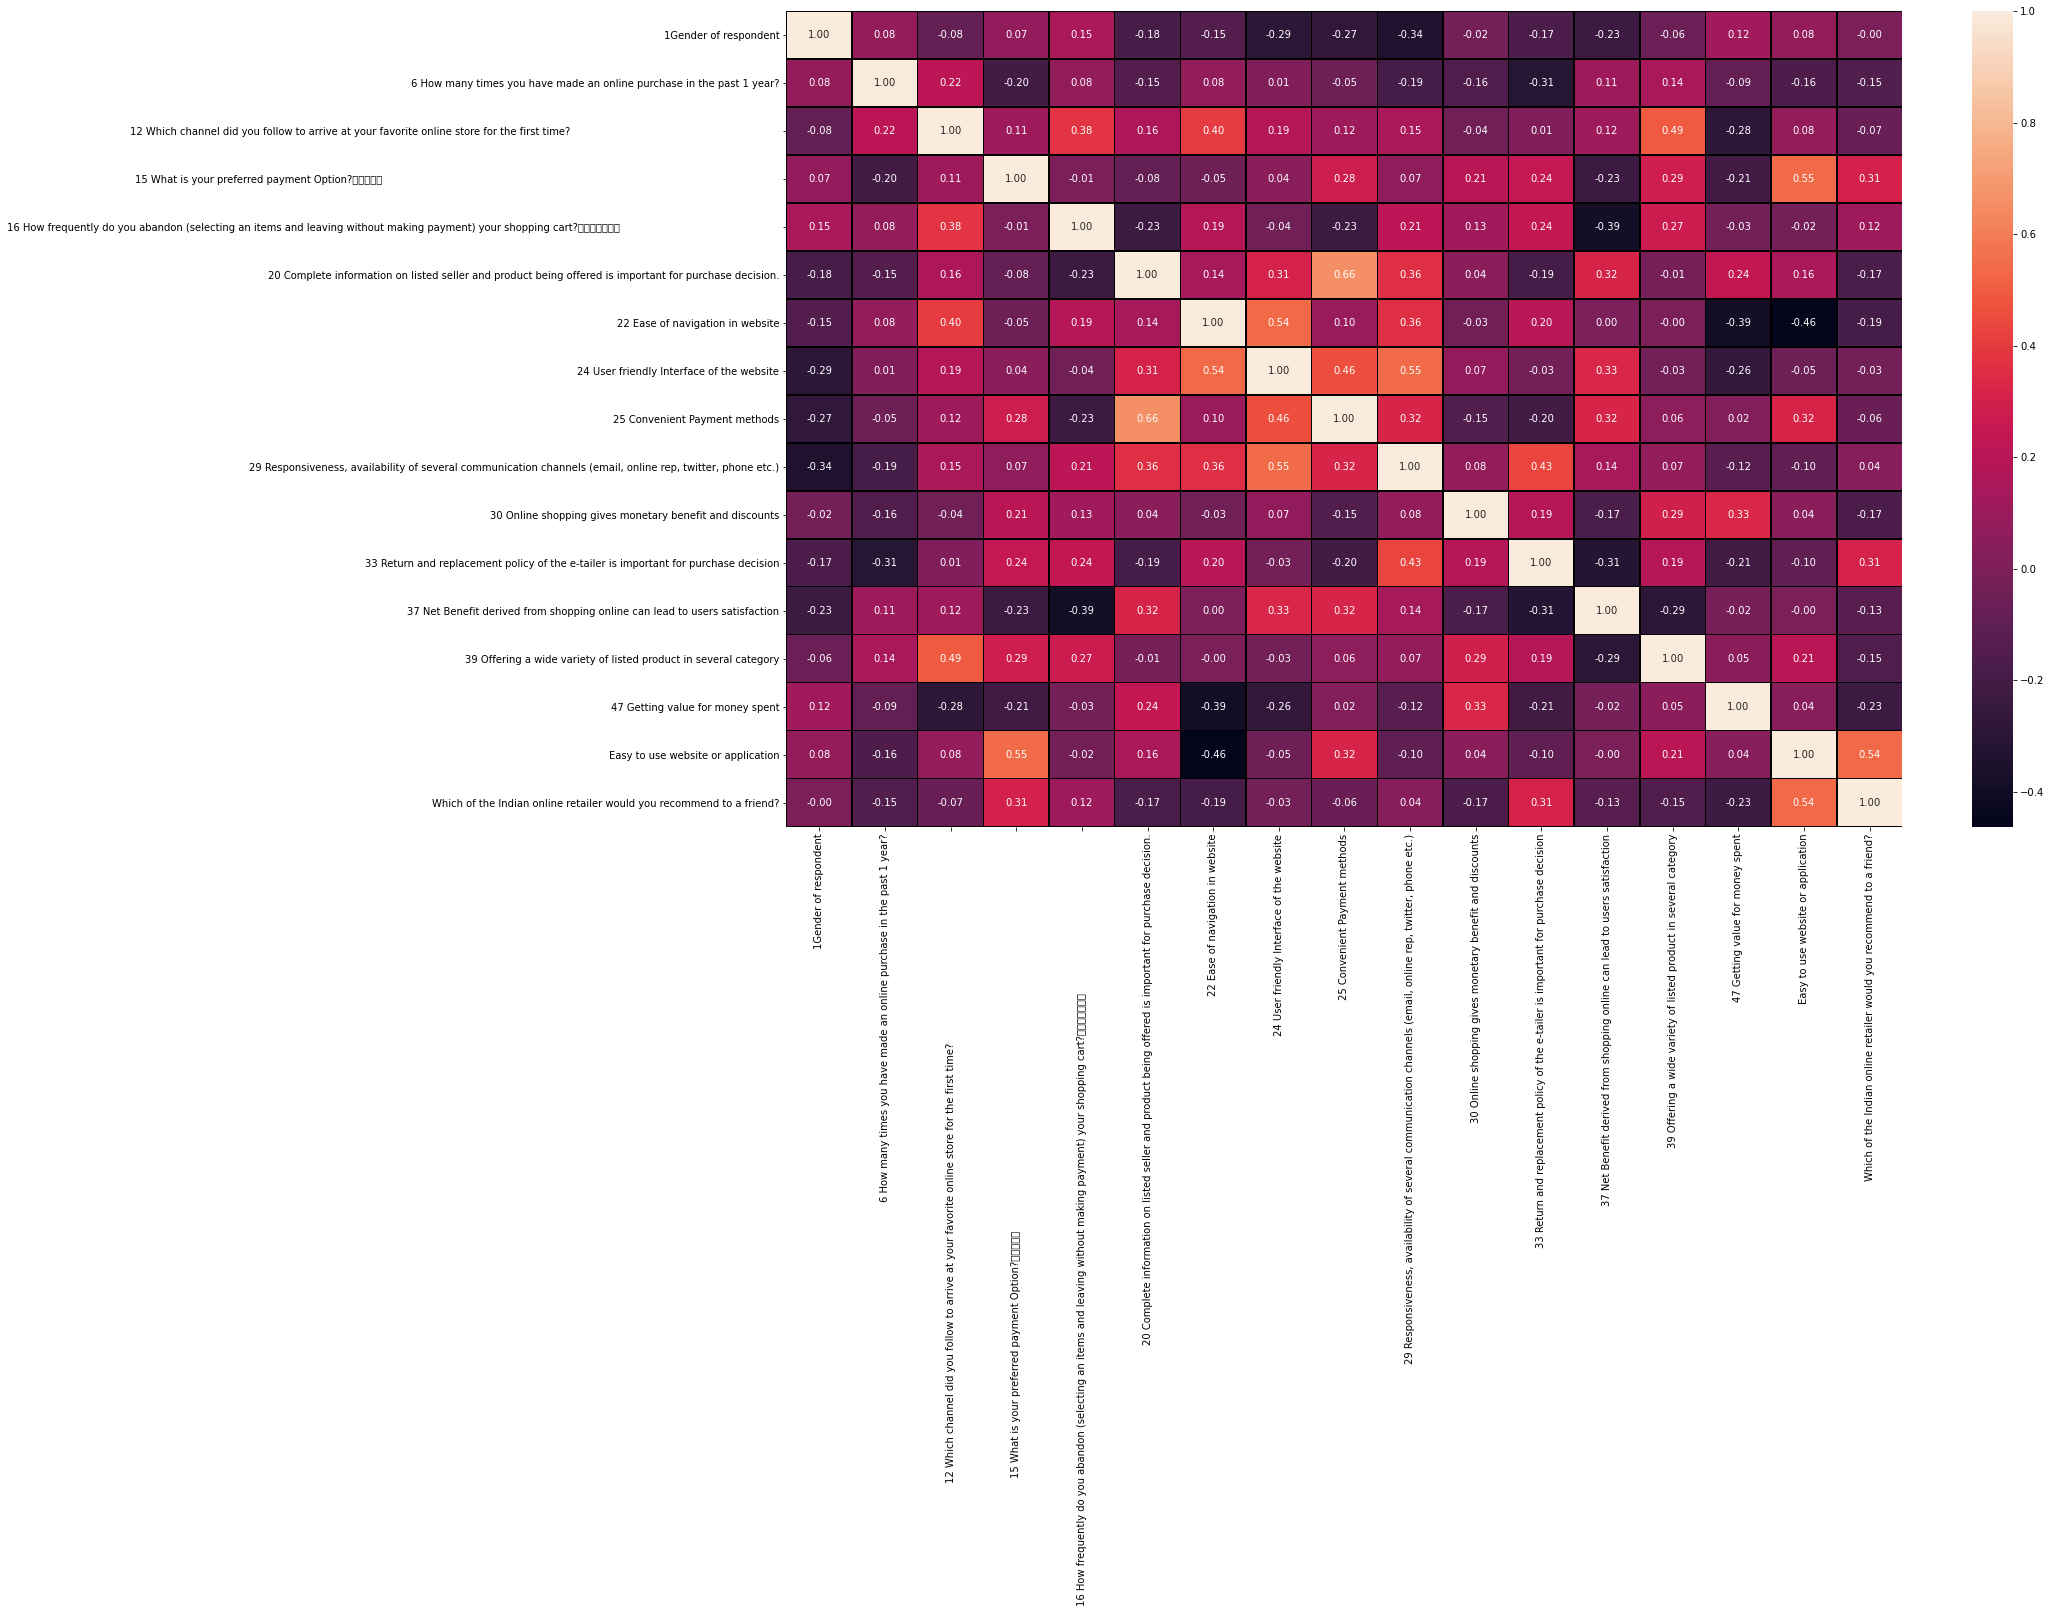

In [46]:
plt.figure(figsize=(25,15))
sns.heatmap(x,annot=True,lw=0.5,linecolor='black',fmt='.2f')

The blocks with darkest colors have least collinearity which is important for our analysis, and the blocks with lightest columns have Maximum collinearity. But since Multi-collinearity doesn't exist in our Dataset, we need not be worried about it. 

# Here, the following columns have the maximum collinearity with our data :
    * 15 What is your preferred payment Option?\t\t\t\t\t
    * 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)
    * 33 Return and replacement policy of the e-tailer is important for purchase decision
    * 37 Net Benefit derived from shopping online can lead to users satisfaction
    * Easy to use website or application

Hence we will plot few more graphs of these 5 columns.    

# Bivariate Analysis

<AxesSubplot:xlabel='1Gender of respondent', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

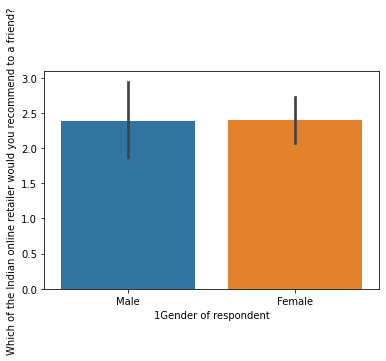

In [47]:
sns.barplot(x=df['1Gender of respondent'],y=X['Which of the Indian online retailer would you recommend to a friend?'])

Either male or female suggests the same website . 

<AxesSubplot:xlabel='29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

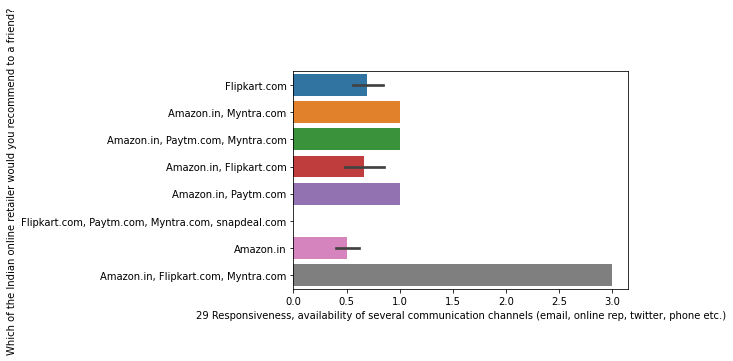

In [48]:
sns.barplot(x=X['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'],y=df['Which of the Indian online retailer would you recommend to a friend?'])

Here we observe that maximum customers prefer Amazon, Myntra and flipkart as they offer Online reply and calls service.

<AxesSubplot:xlabel='33 Return and replacement policy of the e-tailer is important for purchase decision', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

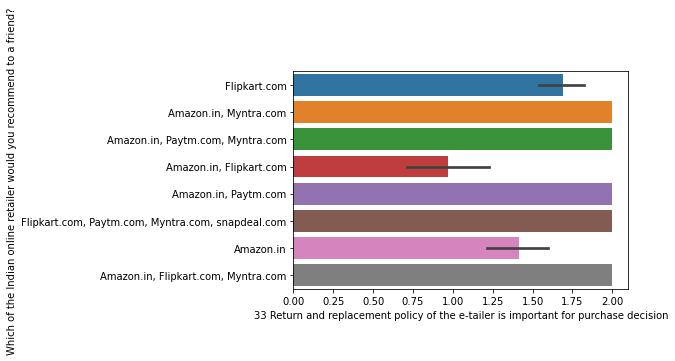

In [49]:
sns.barplot(x=X['33 Return and replacement policy of the e-tailer is important for purchase decision'],y=df['Which of the Indian online retailer would you recommend to a friend?'])

Almost all the customers prefer Amazon, Myntra , Flipkart, Paytm and Snapdeal as they have very good Return and replacement policy.

<AxesSubplot:xlabel='Easy to use website or application', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

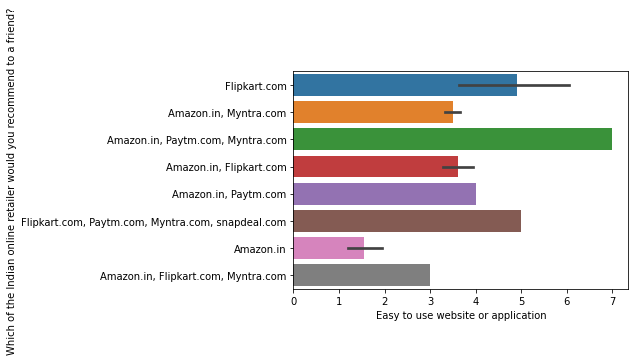

In [50]:
sns.barplot(x=X['Easy to use website or application'],y=df['Which of the Indian online retailer would you recommend to a friend?'])

Maximum customers prefer Amazon, Myntra, Flipkart, Paytm and Snapdeal as they have quite easy navigation .

<AxesSubplot:xlabel='37 Net Benefit derived from shopping online can lead to users satisfaction', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

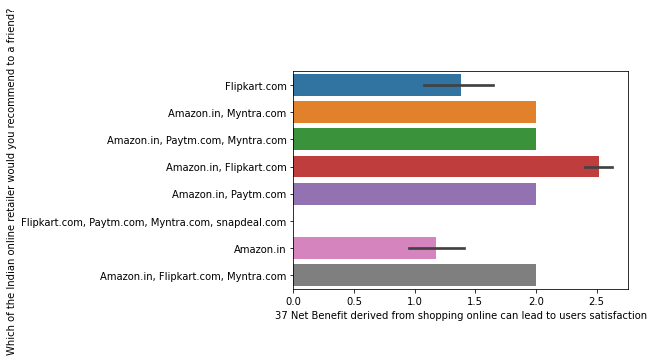

In [51]:
sns.barplot(x=X['37 Net Benefit derived from shopping online can lead to users satisfaction'],y=df['Which of the Indian online retailer would you recommend to a friend?'])

Customers are more satisfied with amazon and flipkart as they are getting maximum benefit from these two websites.

# Conclusion

From all the above data Analysis , we conclude that  a customers prefers to surf at least two websites before making a purchase and their most trustable website seems to be Amazon and Flipkart, followed by Myntra , Paytm  and finally Snapdeal.